# Análisis bivariado

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

In [3]:
df = palmerpenguins.load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Estableciendo relaciones

### Gráficos de puntos

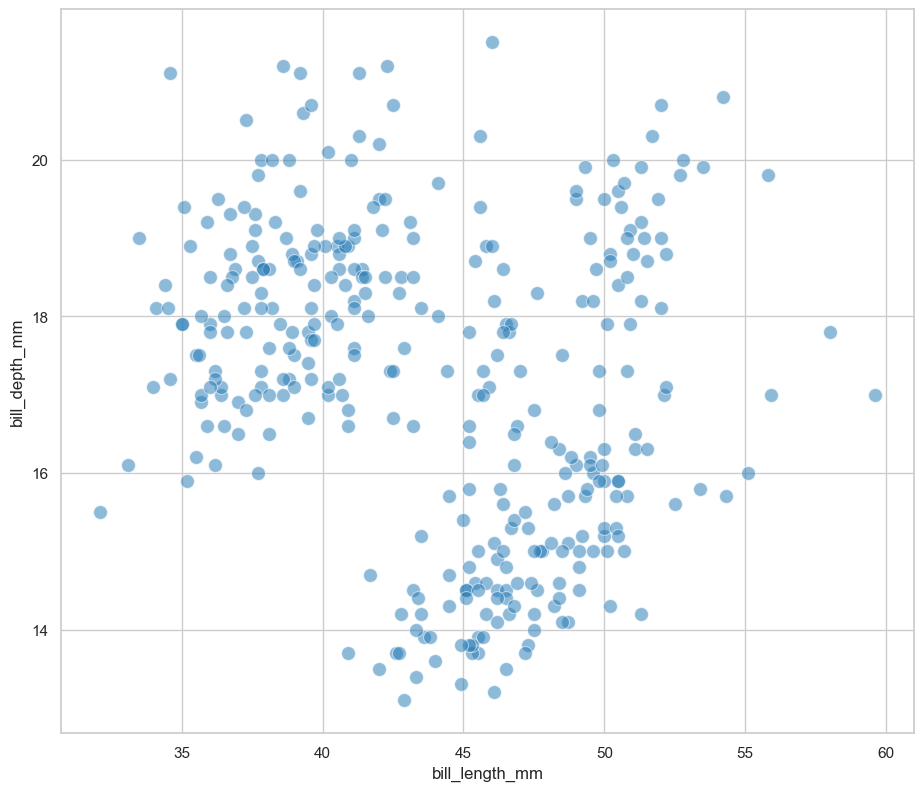

In [7]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', alpha=0.5, s=100)
plt.show()

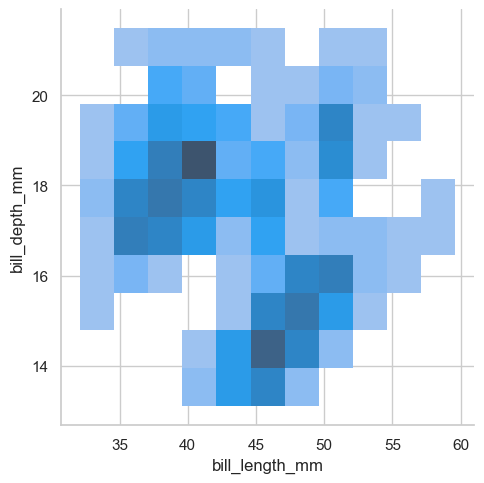

In [9]:
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.show()

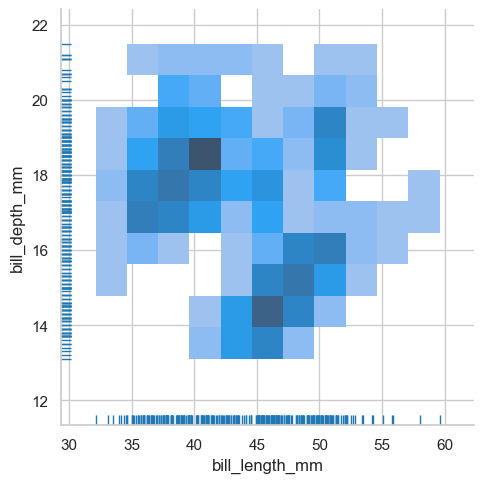

In [10]:
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', rug=True)
plt.show()

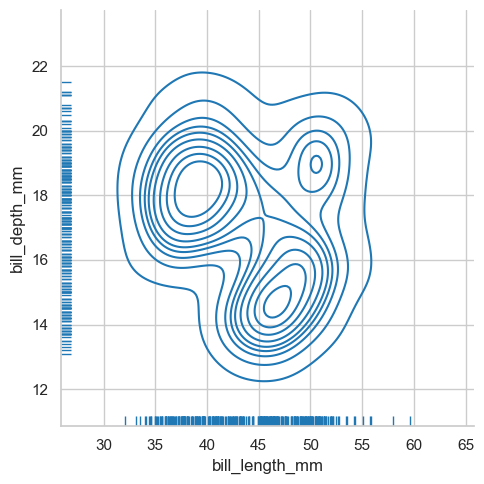

In [11]:
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', rug=True, kind='kde')
plt.show()

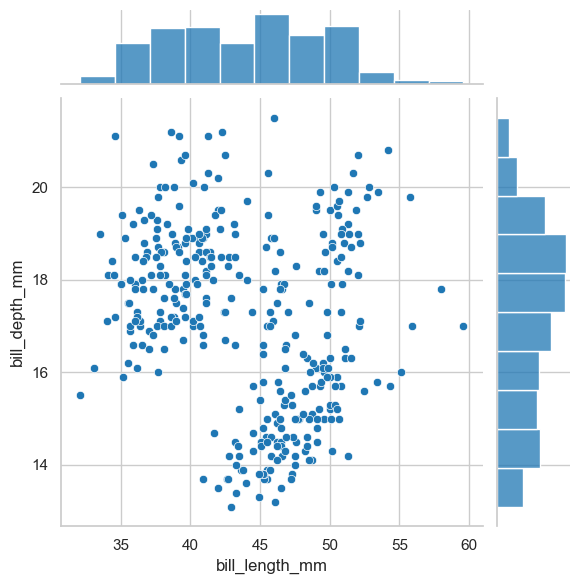

In [15]:
sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.show()

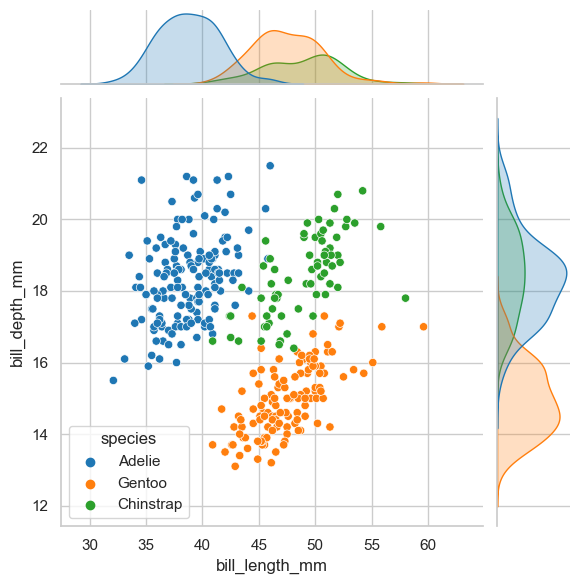

In [16]:
sns.jointplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

### Gráficos de violín y boxplots

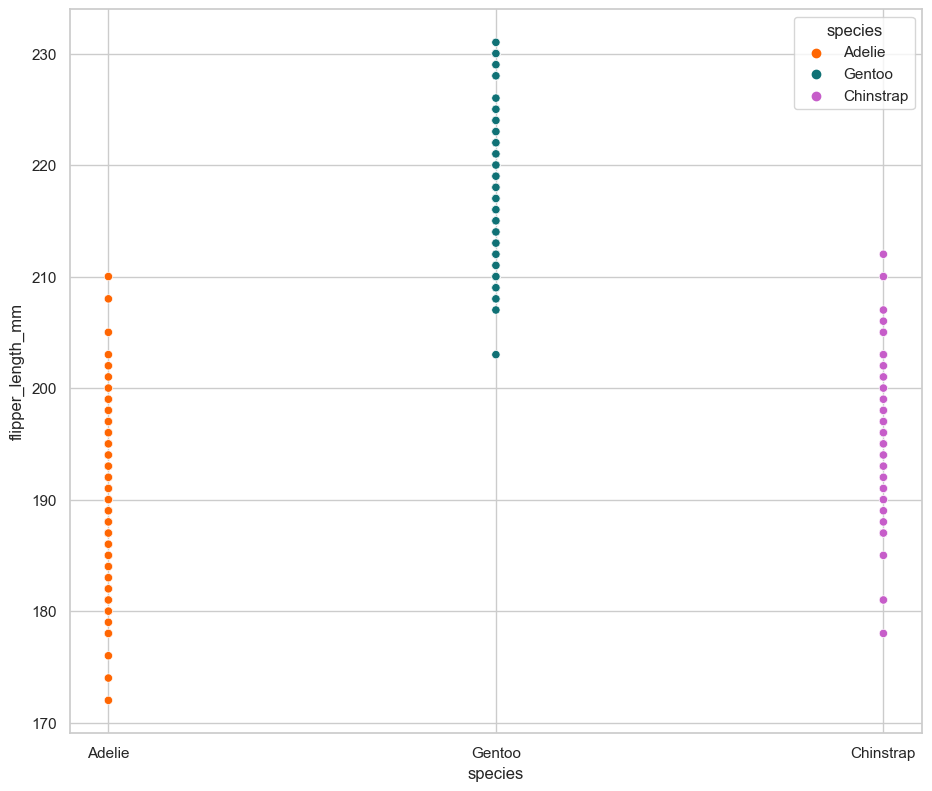

In [19]:
sns.scatterplot(data=df, x='species', y='flipper_length_mm', hue='species', palette=penguin_color)
plt.show()

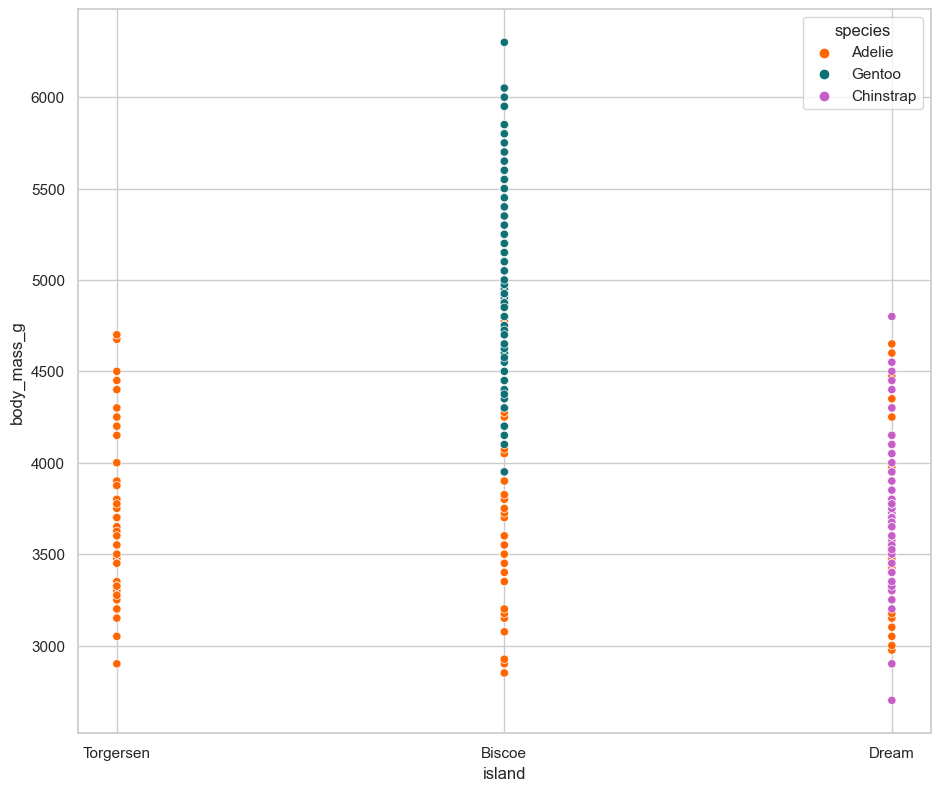

In [30]:
sns.scatterplot(data=df, x='island', y='body_mass_g', hue='species', palette=penguin_color)
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\1140939572.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='species', y='flipper_length_mm', palette=penguin_color)


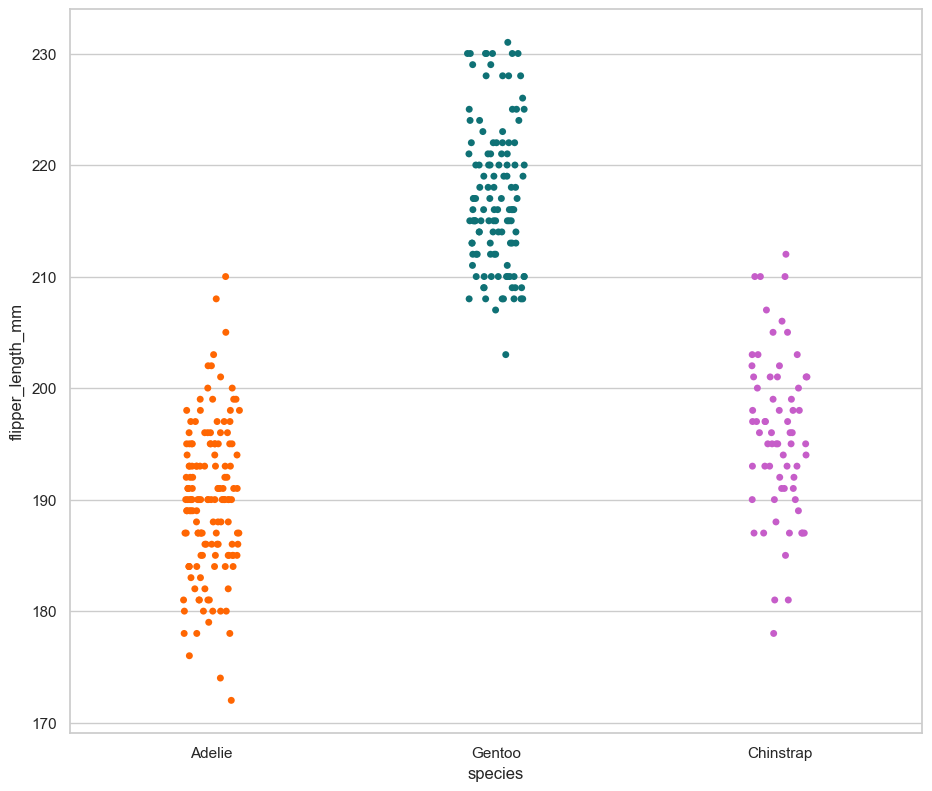

In [21]:
sns.stripplot(data=df, x='species', y='flipper_length_mm', palette=penguin_color)
plt.show()

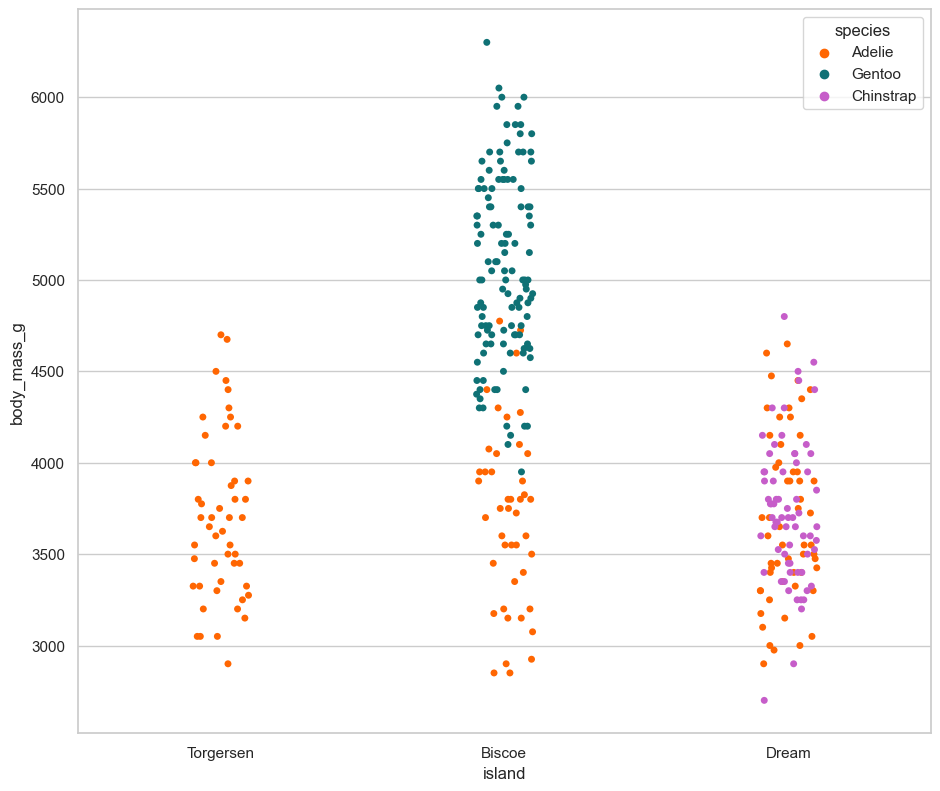

In [31]:
sns.stripplot(data=df, x='island', y='body_mass_g', hue='species', palette=penguin_color)
plt.show()

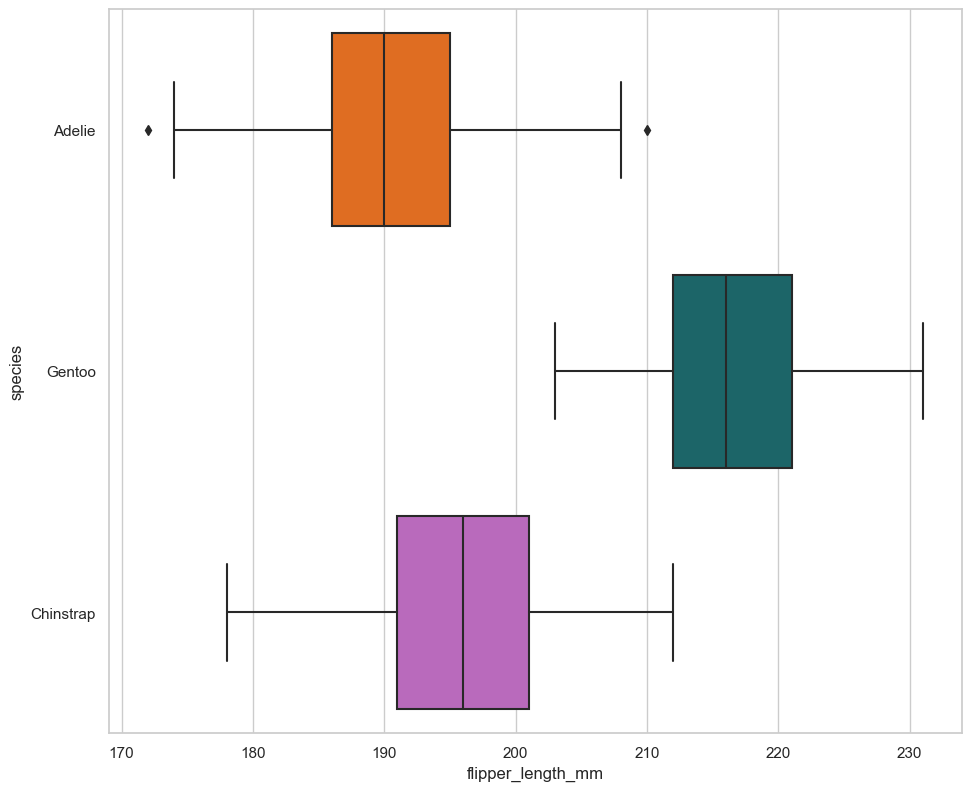

In [23]:
sns.boxplot(data=df, x='flipper_length_mm', y='species', palette=penguin_color)
plt.show()

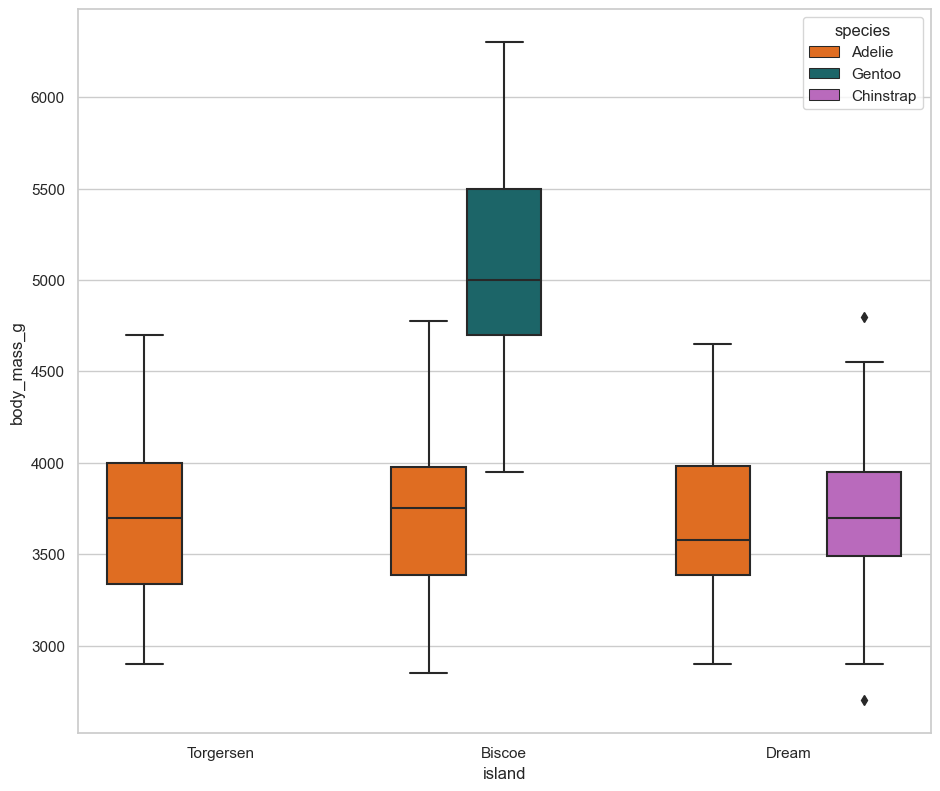

In [32]:
sns.boxplot(data=df, x='island', y='body_mass_g', hue='species', palette=penguin_color)
plt.show()

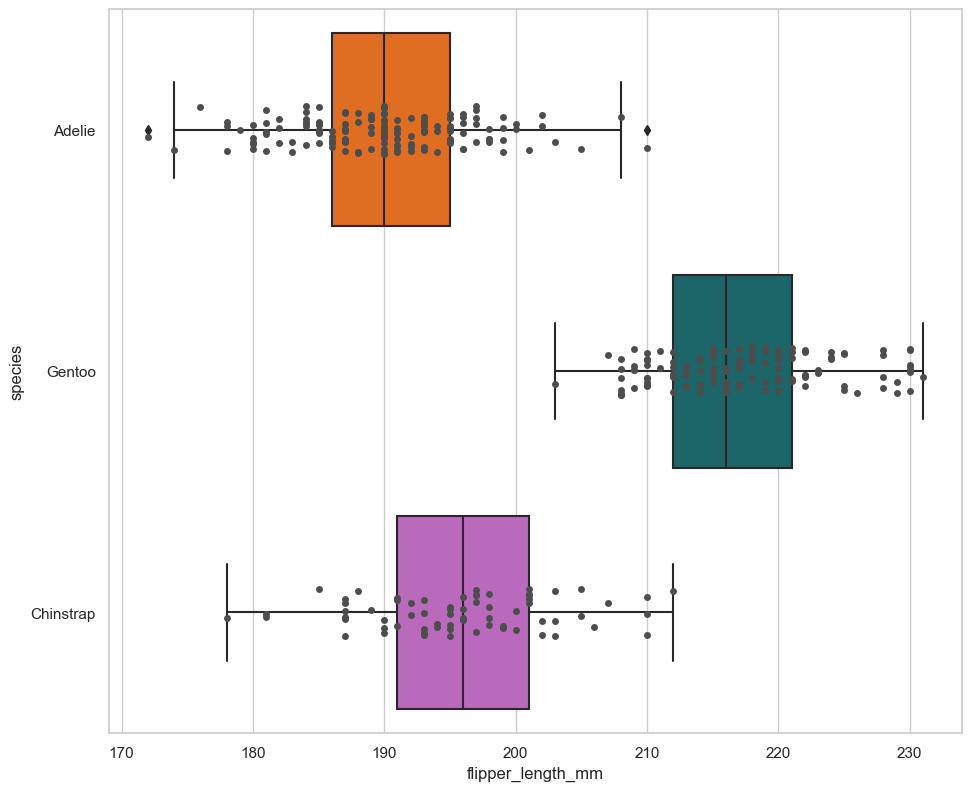

In [24]:
ax = sns.boxplot(data=df, x='flipper_length_mm', y='species', palette=penguin_color)

ax= sns.stripplot(data=df, x='flipper_length_mm', y='species', color='0.3')

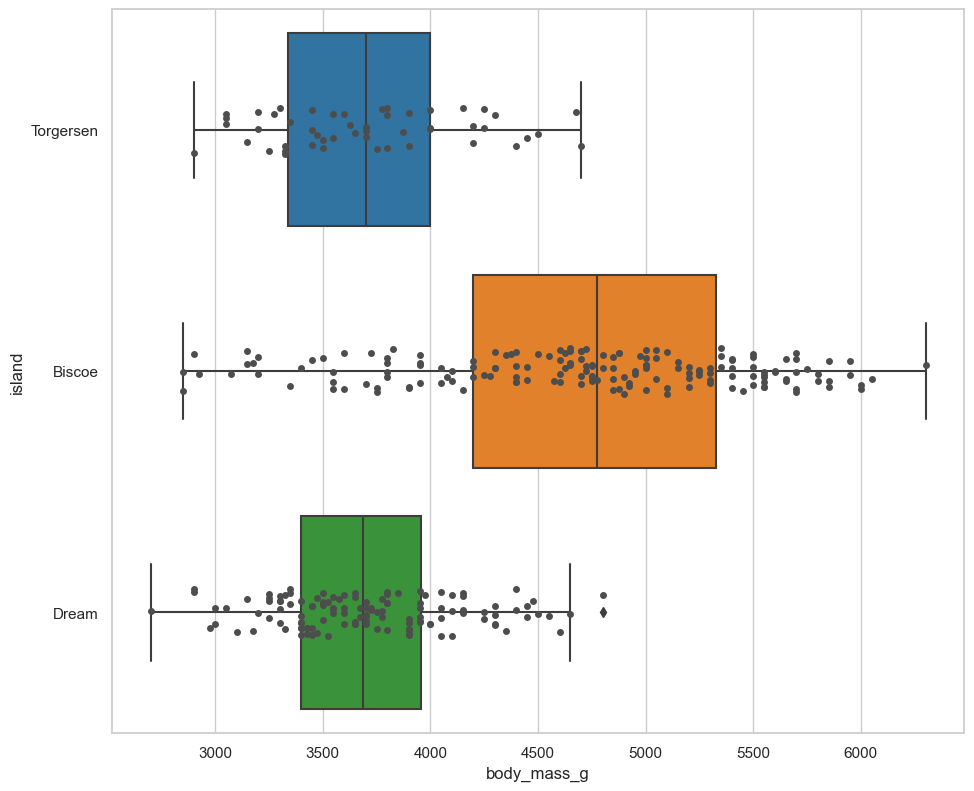

In [34]:
ax = sns.boxplot(data=df, x='body_mass_g', y='island')

ax= sns.stripplot(data=df, x='body_mass_g', y='island', color='0.3')

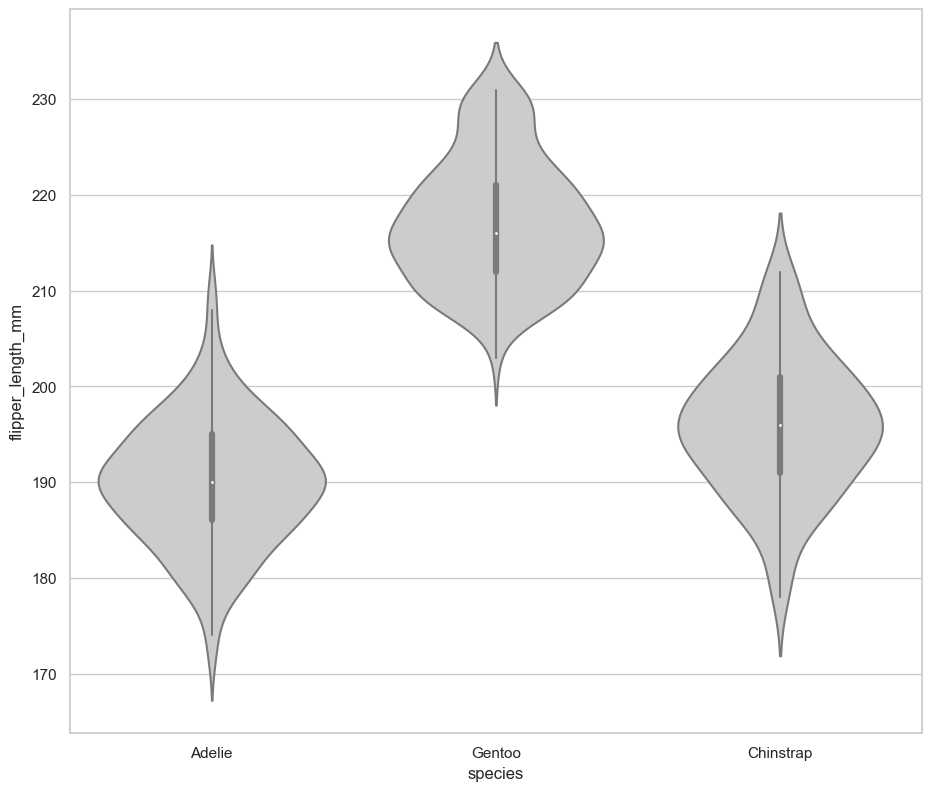

In [26]:
sns.violinplot(data=df, x='species', y='flipper_length_mm', color='0.8')
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\1129713186.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x='species', y='flipper_length_mm', palette=penguin_color)


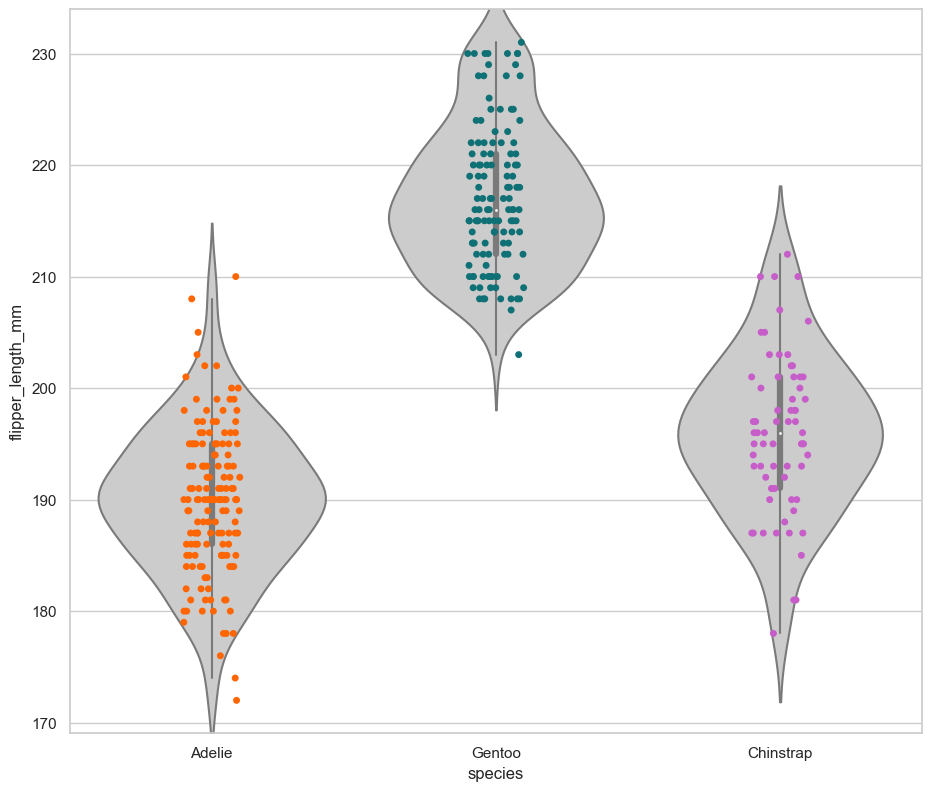

In [27]:
ax = sns.violinplot(data=df, x='species', y='flipper_length_mm', color='0.8')

ax = sns.stripplot(data=df, x='species', y='flipper_length_mm', palette=penguin_color)

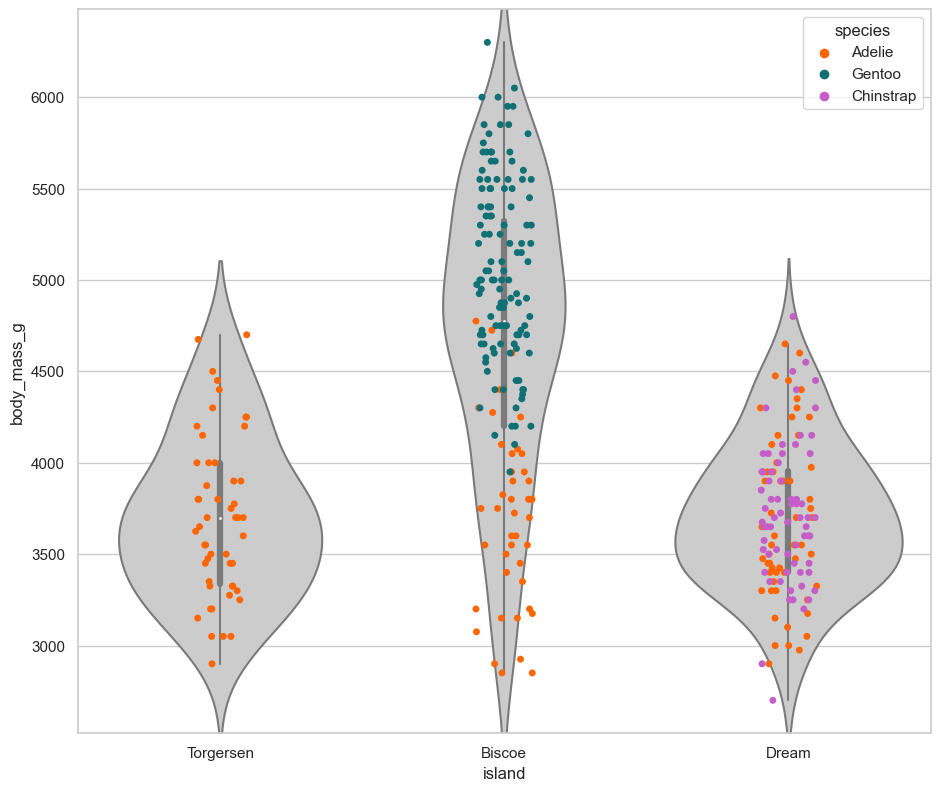

In [39]:
ax = sns.violinplot(data=df, x='island', y='body_mass_g', color='0.8')

ax = sns.stripplot(data=df, x='island', y='body_mass_g', hue='species', palette=penguin_color)

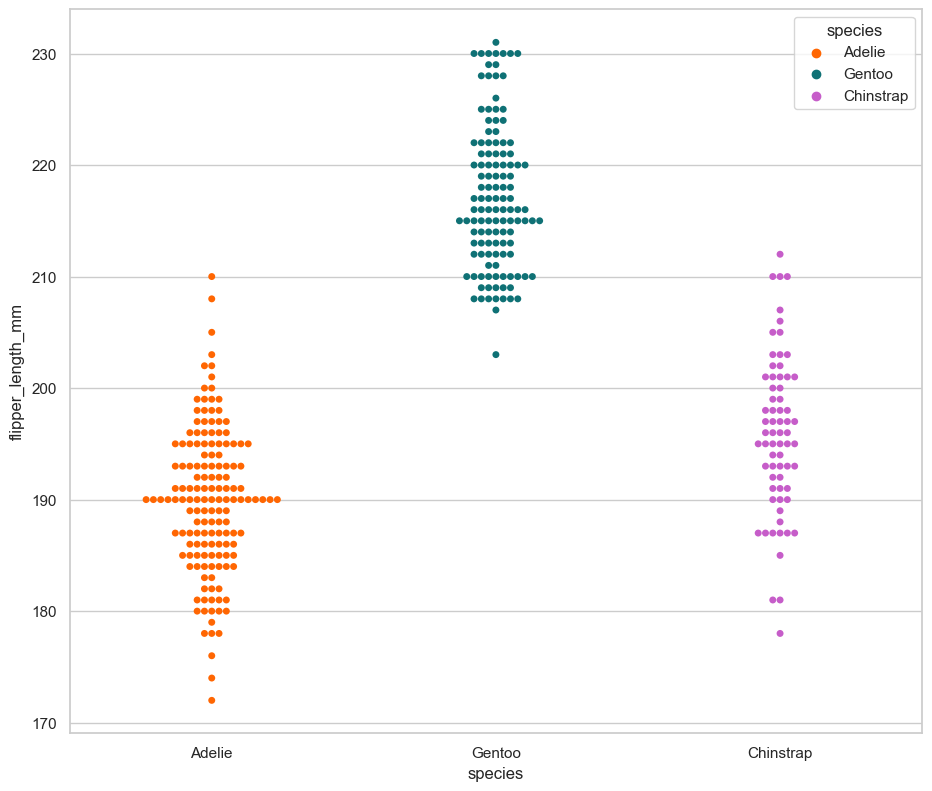

In [29]:
sns.swarmplot(data=df, x='species', y='flipper_length_mm', hue='species', palette=penguin_color)
plt.show()

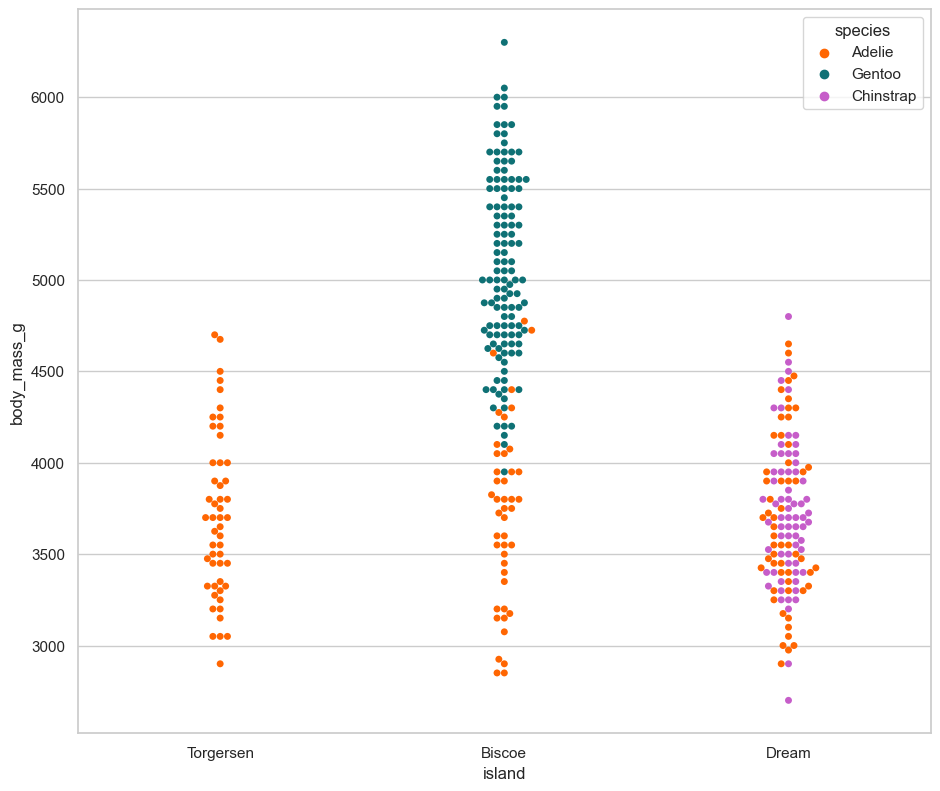

In [40]:
sns.swarmplot(data=df, x='island', y='body_mass_g', hue='species', palette=penguin_color)
plt.show()

### Matrices de correlación

In [42]:
df.corr()

C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\1416838196.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)


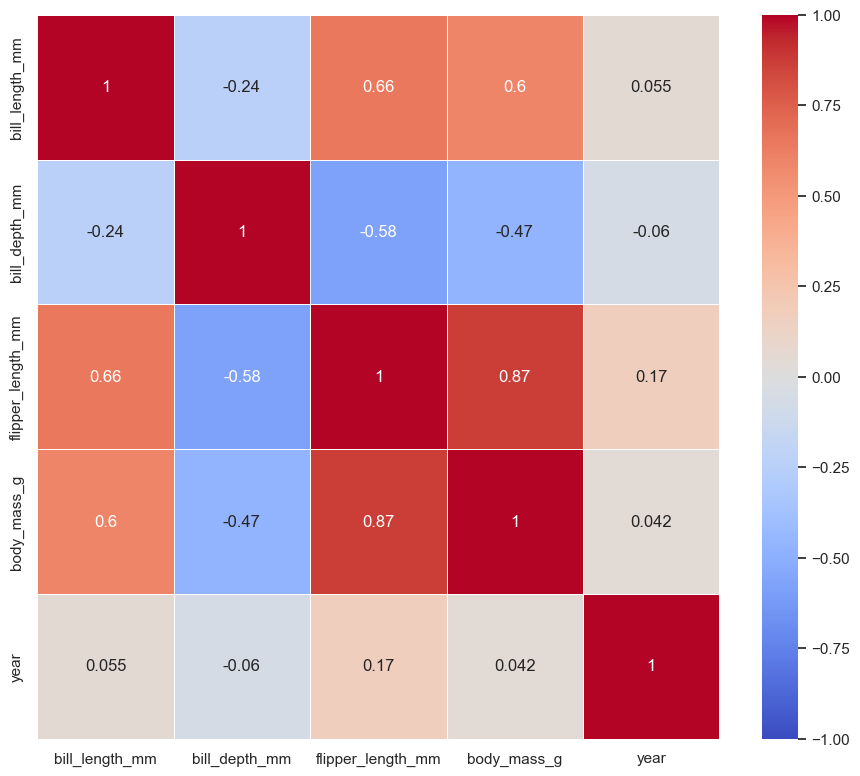

In [47]:
sns.heatmap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\4221015121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)


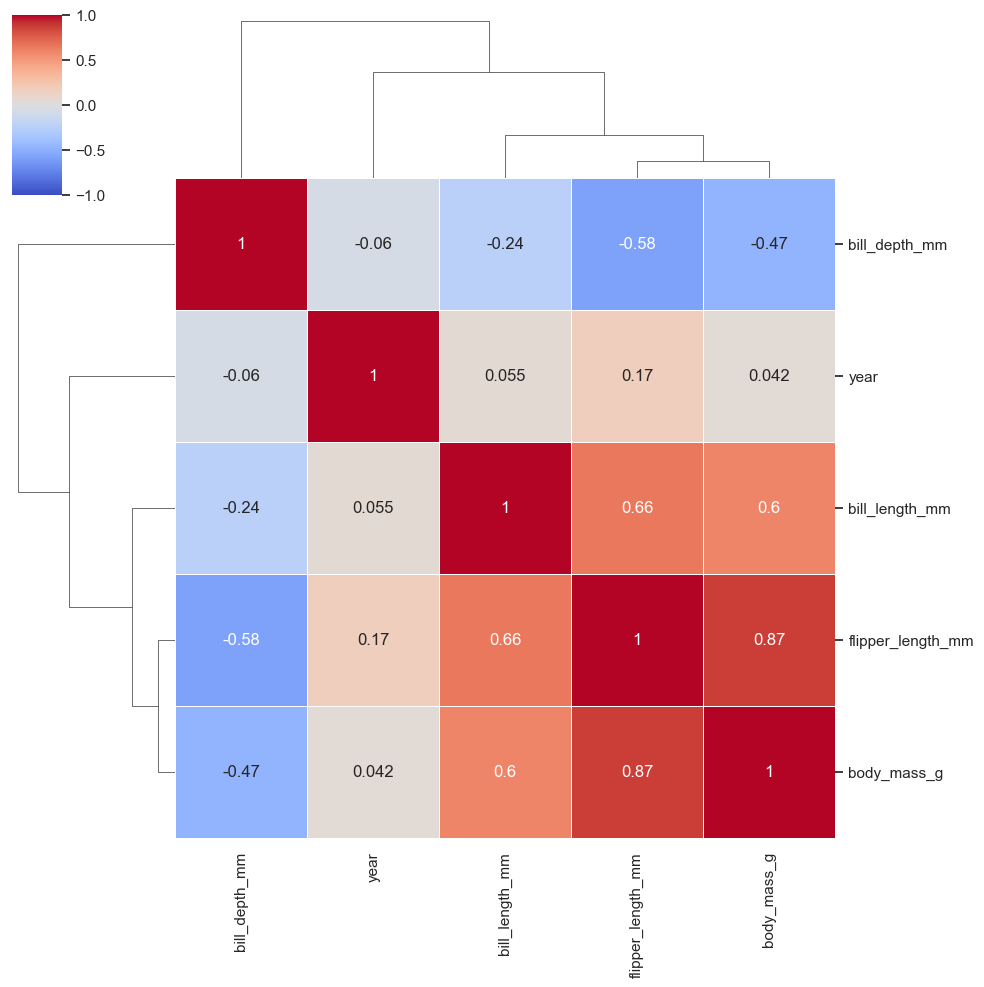

In [48]:
sns.clustermap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)
plt.show()

In [50]:
# ¿Cómo podría representar una variable categórica como númerica discreta?

df = df.assign(numeric_sex=lambda df1 : df1.sex.replace(['female', 'male'], [0,1]))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0.0
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1.0


C:\Users\usuario\AppData\Local\Temp\ipykernel_7588\4221015121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)


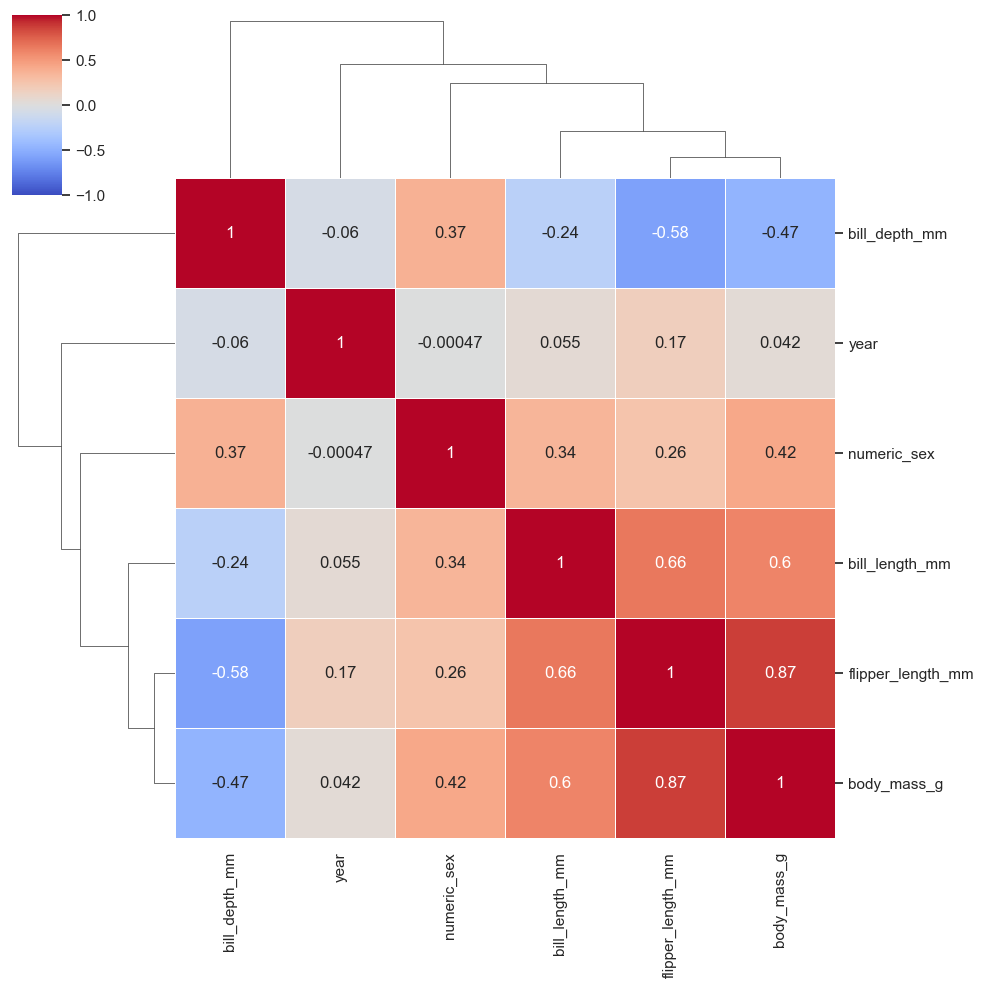

In [51]:
sns.clustermap(data=df.corr(), cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, annot=True)
plt.show()

#### Limitantes de los coeficientes de correlación lineal

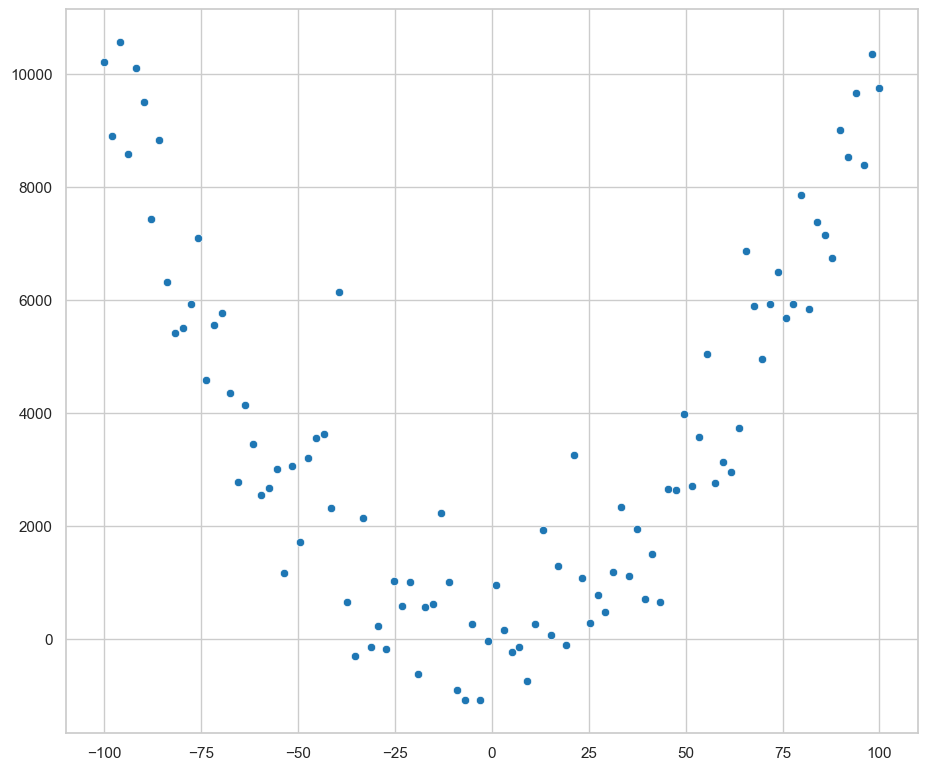

array([[1.        , 0.02069912],
       [0.02069912, 1.        ]])

In [54]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0,1000, x.size)

sns.scatterplot(x=x, y=y)
plt.show()

# Correlación entre los datos
np.corrcoef(x,y)

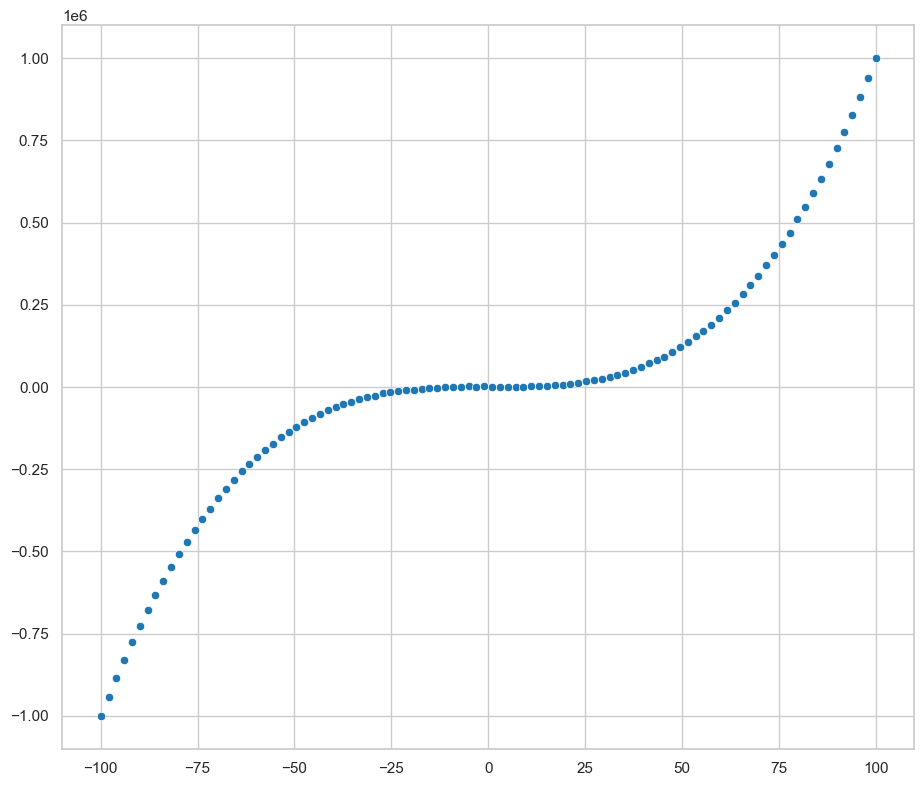

array([[1.        , 0.91657302],
       [0.91657302, 1.        ]])

In [55]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0,1000, x.size)

sns.scatterplot(x=x, y=y)
plt.show()

# Correlación entre los datos
np.corrcoef(x,y)

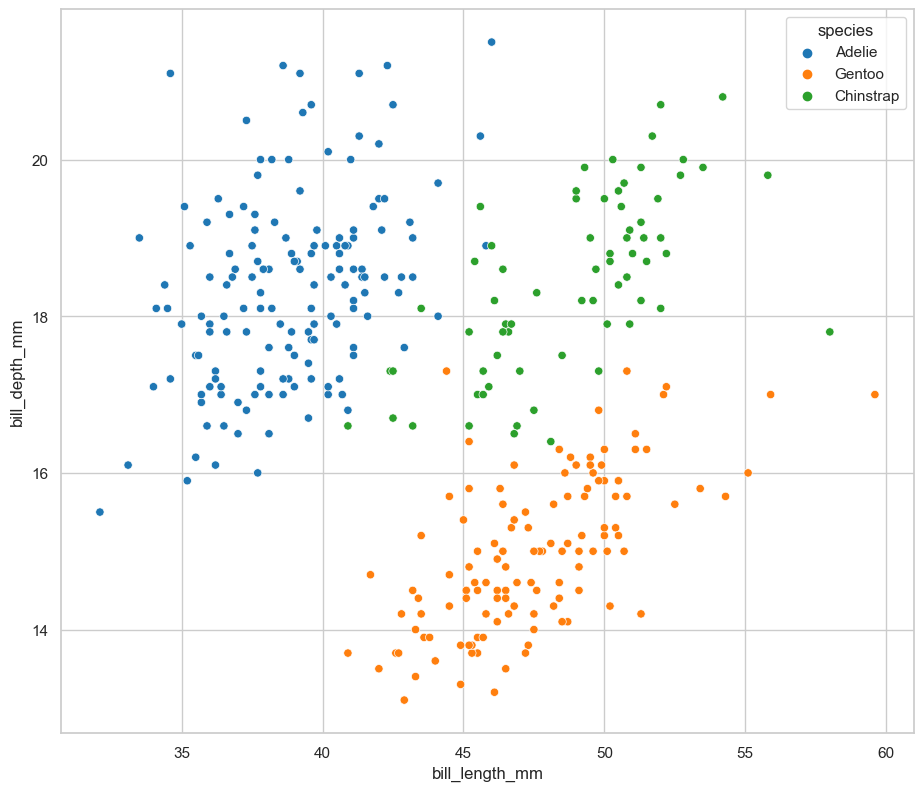

In [58]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


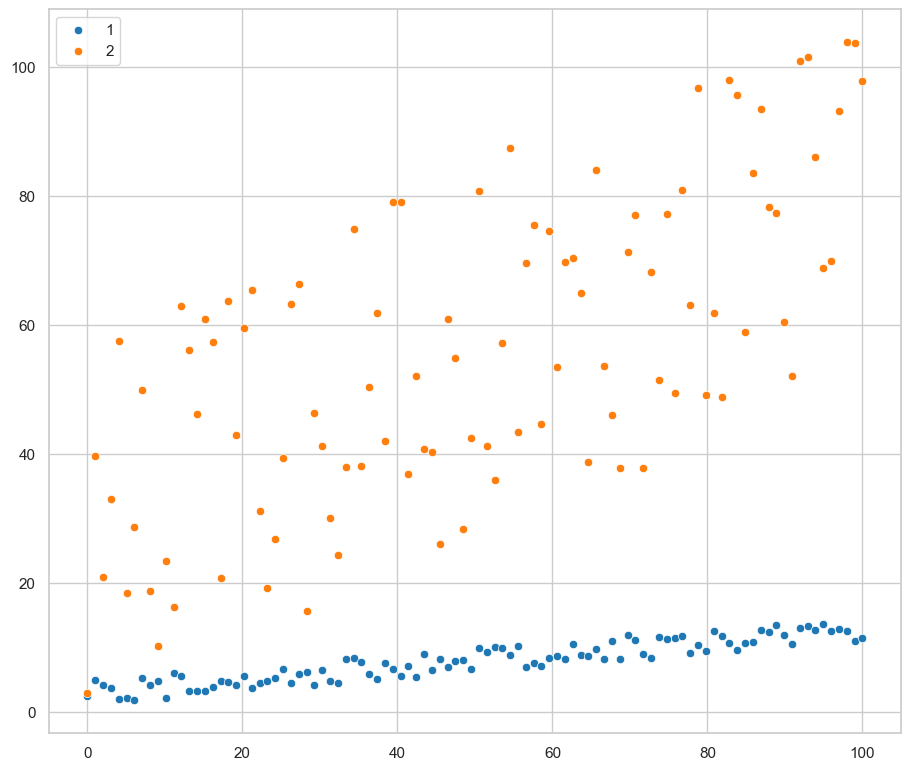

In [59]:
np.random.seed(42)
x_1 = np.linspace(0,100, 100)
y_1 = 0.1*x_1+3+np.random.uniform(-2,2, size=x_1.size)

sns.scatterplot(x=x_1, y=y_1)

x_2 = np.linspace(0,100,100)
y_2 = 0.5*x_2+1+np.random.uniform(0,60, size=x_2.size)

sns.scatterplot(x=x_2, y=y_2)

plt.legend(labels=['1','2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

### Análisis de regresión simple

In [61]:
res1 = scipy.stats.linregress(x=x_1, y=y_1)
res2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res1, res2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


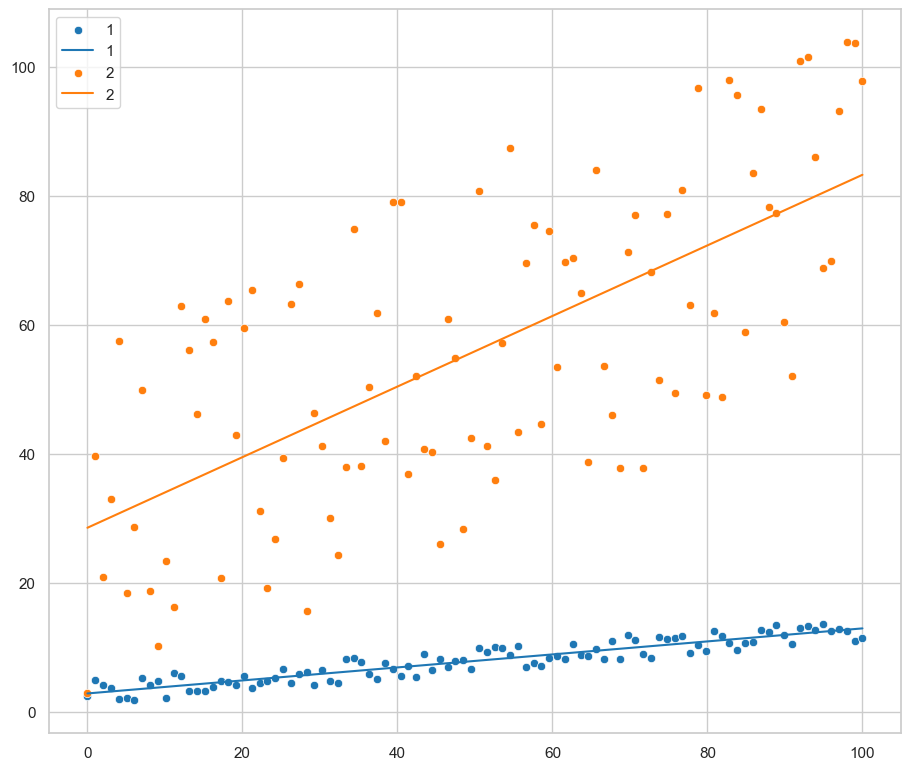

In [63]:
sns.scatterplot(x=x_1, y=y_1)
fx_1=np.array([x_1.min(), x_1.max()])
fy_1 = res1.intercept + res1.slope*fx_1
plt.plot(fx_1, fy_1)

sns.scatterplot(x=x_2, y=y_2)
fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 = res2.intercept + res2.slope*fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])
plt.show()

LinregressResult(slope=-0.08502128077717654, intercept=20.88546831853275, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.019066944825560005, intercept_stderr=0.8438832083314671)


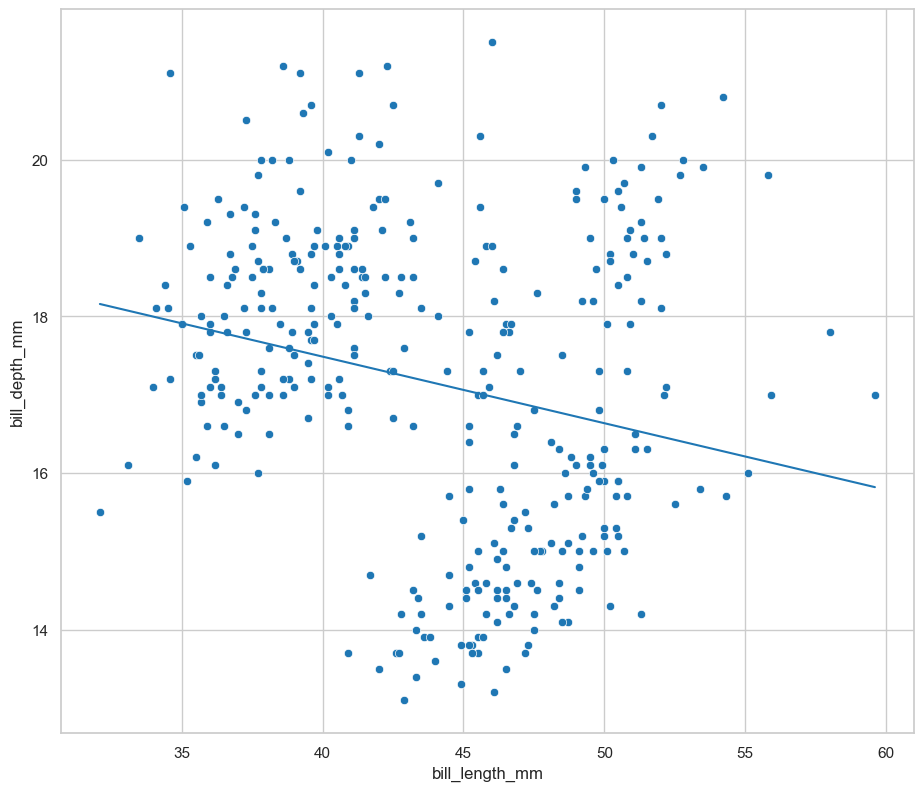

In [77]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm')

res = scipy.stats.linregress(x=df.bill_length_mm.dropna(), y=df.bill_depth_mm.dropna())
print(res)

fx_1 = np.array([df.bill_length_mm.min(), df.bill_length_mm.max()])
fy_1 = res.intercept + res.slope*fx_1

plt.plot(fx_1, fy_1)

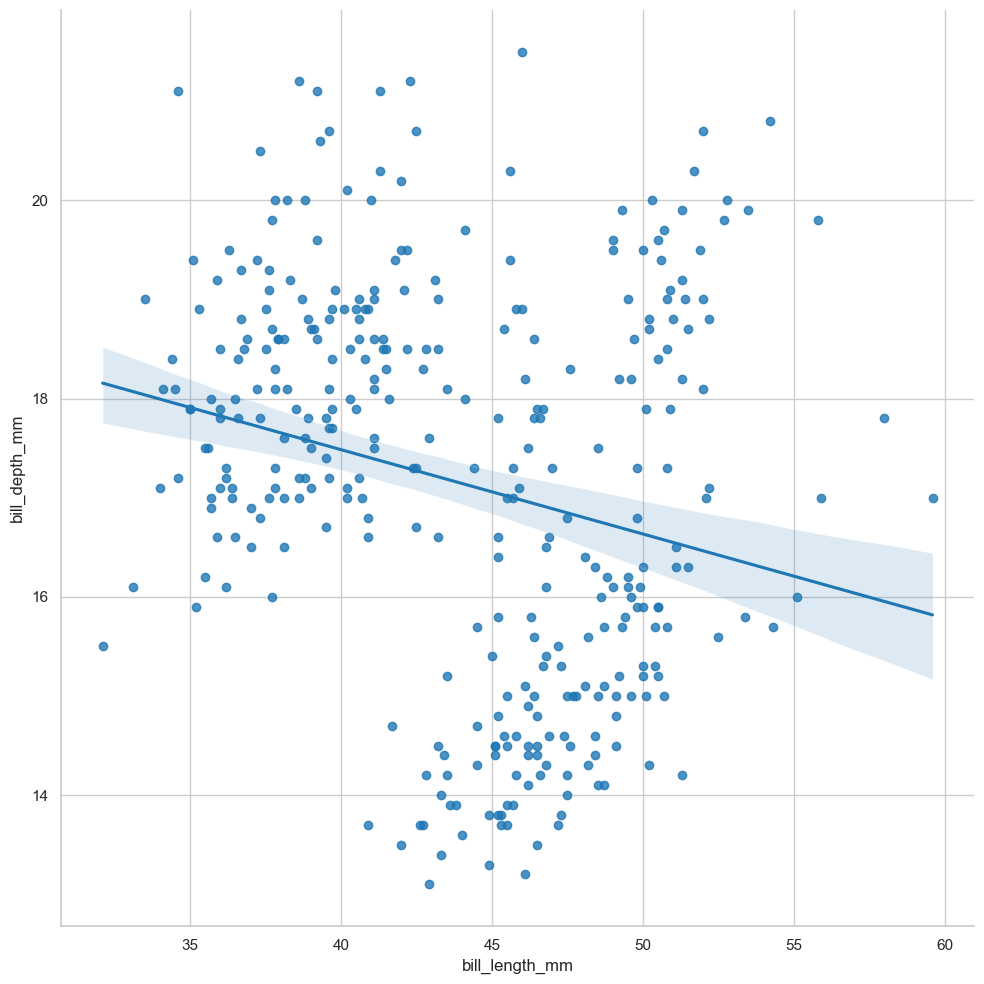

In [71]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', height=10)

### Limitaciones del análisis de regresión simple

#### La regresión lineal simple NO es simétrica

In [75]:
x = df['bill_length_mm'].dropna()
y = df['bill_depth_mm'].dropna()

resxy = scipy.stats.linregress(x=x, y=y)
resyx = scipy.stats.linregress(x=y, y=x)

print(resxy, resyx, sep='\n')

LinregressResult(slope=-0.08502128077717654, intercept=20.88546831853275, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.019066944825560005, intercept_stderr=0.8438832083314671)
LinregressResult(slope=-0.6498355630183156, intercept=55.06736977191969, rvalue=-0.23505287035553257, pvalue=1.1196621961373535e-05, stderr=0.14573267671925105, intercept_stderr=2.5159514161568546)


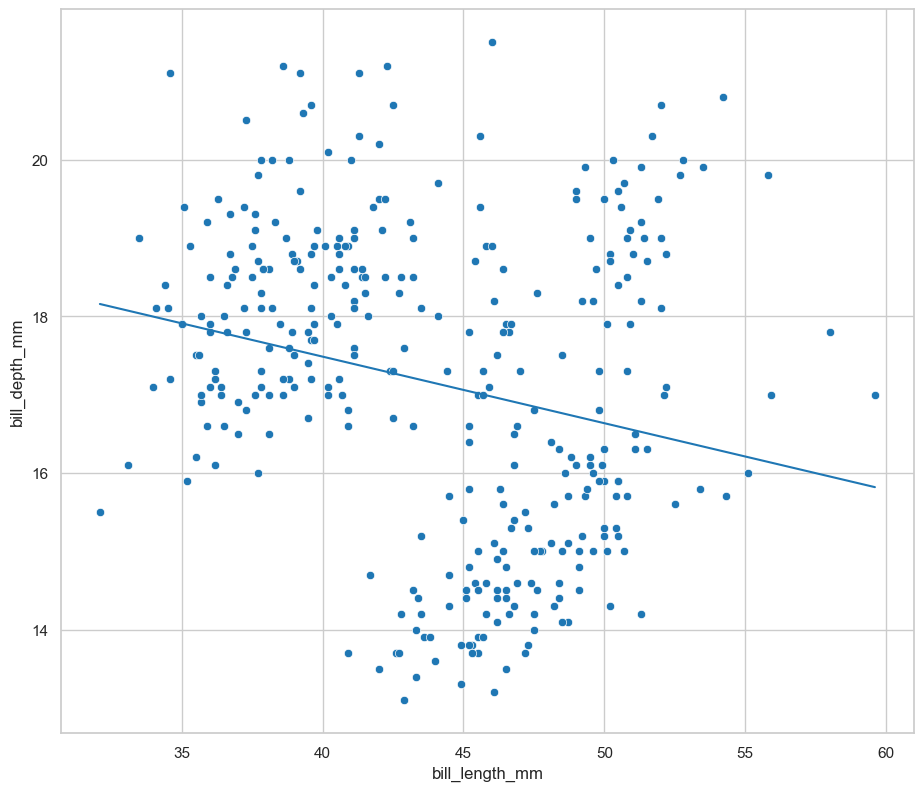

In [79]:
sns.scatterplot(x=x, y=y)

fx_1 = np.array([x.min(), x.max()])
fy_1 = resxy.intercept + resxy.slope*fx_1

plt.plot(fx_1, fy_1)
plt.show()

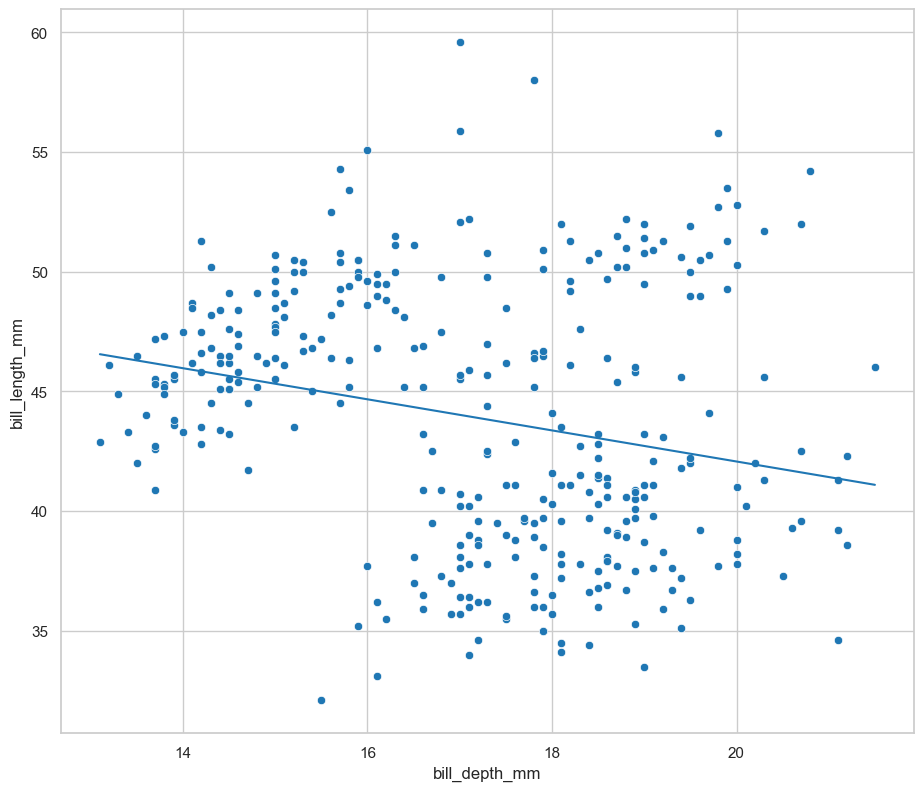

In [80]:
sns.scatterplot(x=y, y=x)

fx_2 = np.array([y.min(), y.max()])
fy_2 = resyx.intercept + resyx.slope*fx_2

plt.plot(fx_2, fy_2)
plt.show()

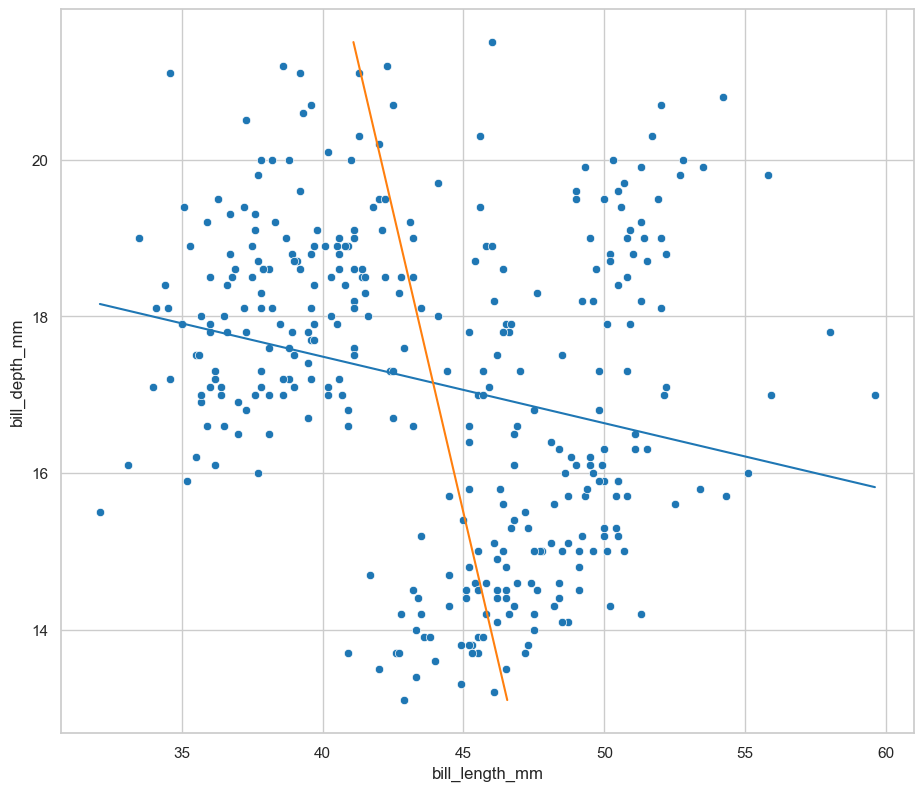

In [82]:
sns.scatterplot(x=x, y=y)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

plt.show()

In [84]:
smf.ols(formula='bill_length_mm ~ bill_depth_mm', data=df).fit().params

Intercept        55.067370
bill_depth_mm    -0.649836
dtype: float64

In [85]:
smf.ols(formula='bill_depth_mm ~ bill_length_mm', data=df).fit().params

Intercept         20.885468
bill_length_mm    -0.085021
dtype: float64